In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_data,city_data,on='city',how="left")


# Display the data table for preview
combined_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

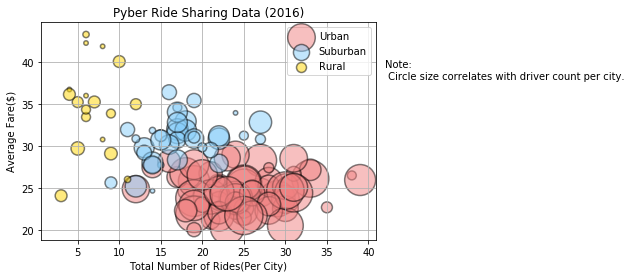

In [6]:
# Obtain the x and y coordinates for each of the three city types

#Find the average fare per city.

average_fare = combined_df.groupby("city")["fare"].mean()
average_fare

total_rides = combined_df.groupby("city")["ride_id"].count()
total_rides

total_drivers = combined_df.groupby("city")["driver_count"].mean()
total_drivers

city_data_df = city_data.set_index('city')['type']

city_data_df.value_counts()

pyber_cities = pd.DataFrame({"Average Fare per City":average_fare,
                 "Number of Rides": total_rides,
                 "Number of Drivers": total_drivers,
                 "City Type": city_data_df
})
pyber_cities.head()

#Urban
urban = pyber_cities.loc[pyber_cities["City Type"]== "Urban"]

#suburban
suburban = pyber_cities.loc[pyber_cities["City Type"]== "Suburban"]

#rural
rural = pyber_cities.loc[pyber_cities["City Type"]== "Rural"]

# Build the scatter plots for each city types

#Urban
plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], color = "LightCoral", edgecolors="black", s = urban["Number of Drivers"]*20, label = "Urban", alpha = 0.5, linewidth = 1.5)

#Suburban
plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], color = "lightskyblue", edgecolors ="black", s = suburban["Number of Drivers"]*20, label = "Suburban", alpha = 0.5, linewidth = 1.5)

#Rural
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], color = "Gold", edgecolors = "black", s = rural["Number of Drivers"]*20, label = "Rural", alpha = 0.5, linewidth = 1.5)
plt.grid()
#Add title, x axis label and y axis label.
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.text(42, 38,"Note:\n Circle size correlates with driver count per city.")

#Add the legend.
plt.legend(loc= "upper right")

#Show plot.

plt.show()


## Total Fares by City Type

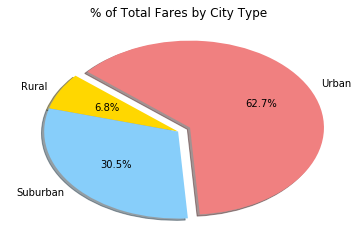

In [7]:
# Calculate Type Percents
city_df = combined_df.loc[:, ["fare" , "type"]]
city_type_df = city_df.groupby("type")

total_fares_df = city_type_df["fare"].sum()

# Build Pie Chart

explode = (0,0,0.1)
colors=["gold" ,"lightskyblue","LightCoral"]


plt.pie(total_fares_df, explode=explode, labels=["Rural","Suburban","Urban"], colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)


# Save Figure
plt.savefig("../Images/total_fares.png")

# Show Figure
plt.title("% of Total Fares by City Type")
plt.show()

## Total Rides by City Type

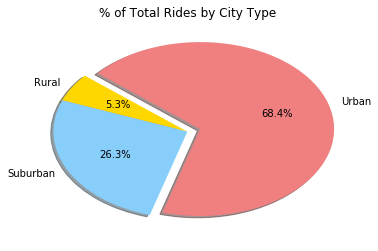

In [8]:
# Calculate Ride Percents

city_df = combined_df.loc[:, ["ride_id" , "type"]]
city_type_df = city_df.groupby("type")

total_rides_df = city_type_df["ride_id"].count()


# Build Pie Chart

explode = (0,0,0.1)
colors=["gold" ,"lightskyblue","LightCoral"]

plt.pie(total_rides_df, explode=explode, labels=["Rural","Suburban","Urban"], colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)


# Save Figure
plt.savefig("../Images/total_rides.png")

# Show Figure
plt.title("% of Total Rides by City Type")
plt.show()


## Total Drivers by City Type

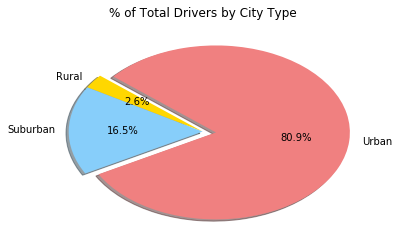

In [9]:
# Calculate Driver Percents

city_data = city_data.groupby("type")
total_drivers_df = city_data["driver_count"].sum()


# Build Pie Chart

explode = (0,0,0.1)
colors=["gold" ,"lightskyblue","LightCoral"]

plt.pie(total_drivers_df, explode=explode, labels=["Rural","Suburban","Urban"], colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)


# Save Figure
plt.savefig("../Images/total_drivers.png")

# Show Figure
plt.title("% of Total Drivers by City Type")
plt.show()

